<a href="https://colab.research.google.com/github/UmerButt015/codealpha_task/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Sales Prediction using Python*

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
# Step 2: Load and inspect data
df = pd.read_csv('sales.csv', index_col=0)
print("First 5 rows:")
print(df.head())
print("\nData Summary:")
print(df.describe())


First 5 rows:
      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Data Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [3]:
# Step 3: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


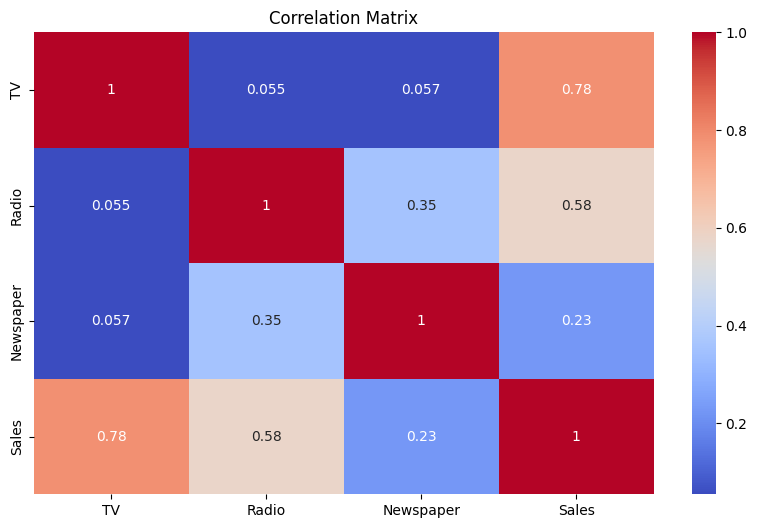

In [4]:
# Step 4: Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

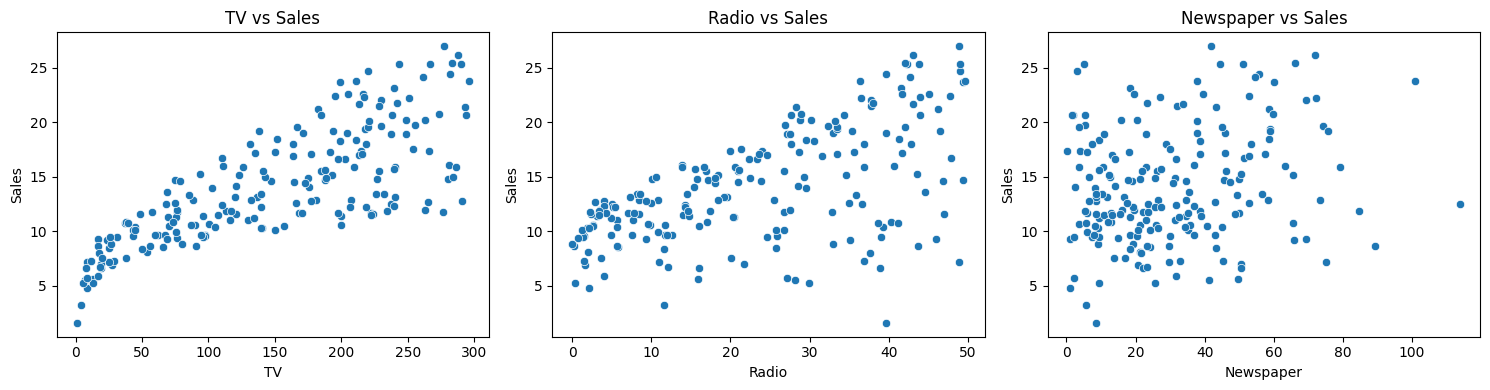

In [5]:
# Step 5: Data Visualization
# Scatter plots of features vs sales
plt.figure(figsize=(15, 4))
for i, col in enumerate(['TV', 'Radio', 'Newspaper'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=col, y='Sales')
    plt.title(f'{col} vs Sales')
plt.tight_layout()
plt.show()


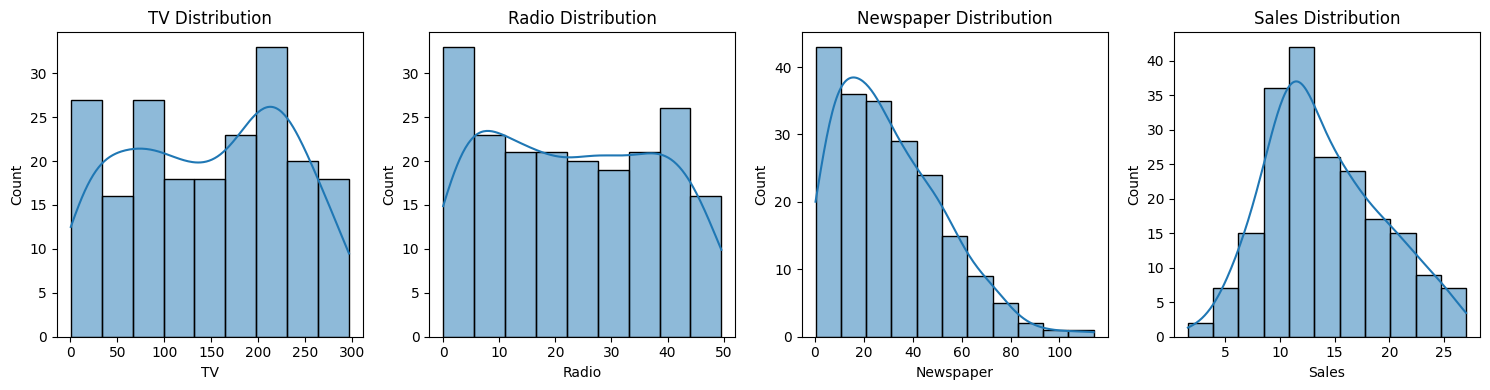

In [6]:
# Distribution plots
plt.figure(figsize=(15, 4))
for i, col in enumerate(['TV', 'Radio', 'Newspaper', 'Sales'], 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [7]:
# Step 6: Prepare data for modeling
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:


# Step 7: Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Model evaluation
print("\nModel Coefficients:")
print(pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient']))



Model Coefficients:
           Coefficient
TV            0.044059
Radio         0.199287
Newspaper     0.006882


In [10]:
print("\nRegression Metrics:")
print('R² Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Regression Metrics:
R² Score: 0.8609466508230368
MAE: 1.5116692224549086
MSE: 3.79679723671522
RMSE: 1.9485372043446387


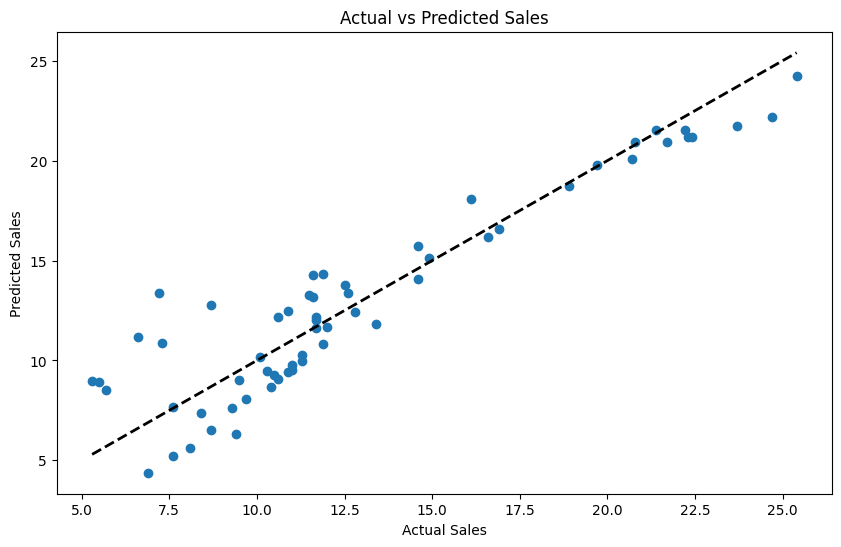

In [11]:
# Step 10: Visualization of predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


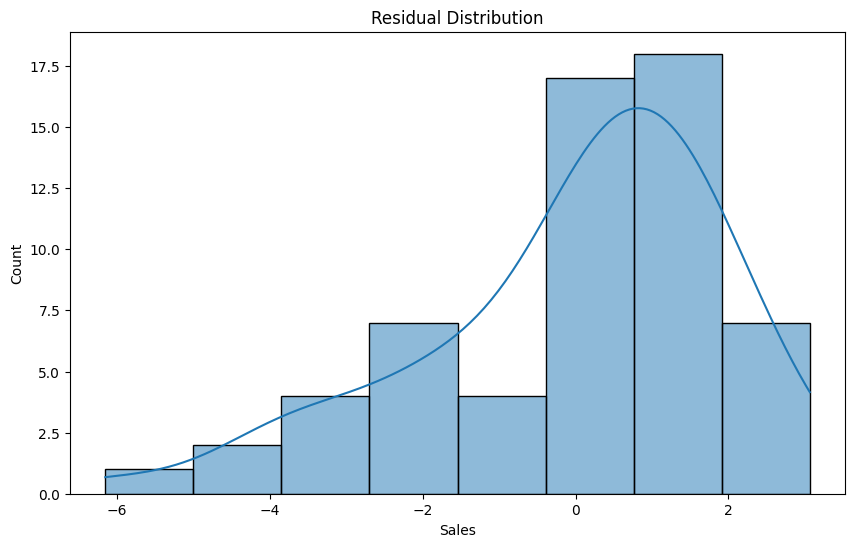

In [12]:
# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

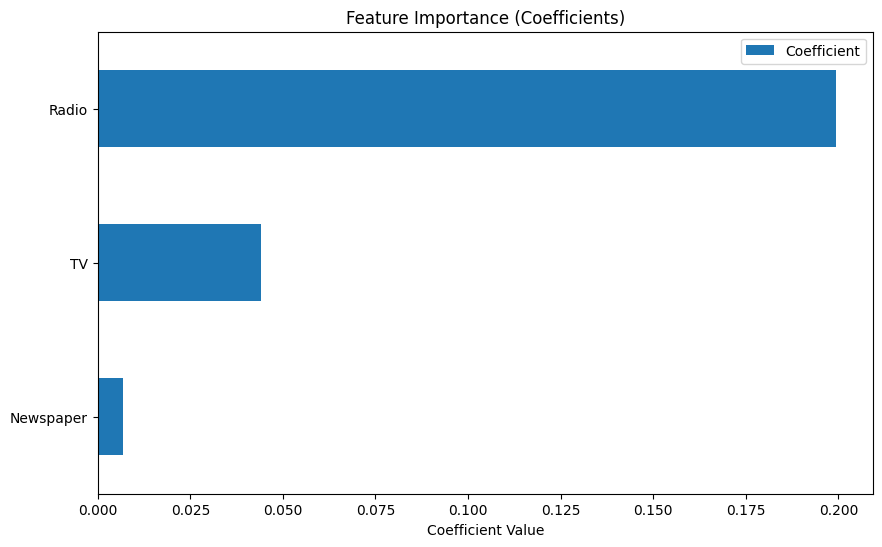

In [13]:
# Feature importance visualization
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coefficients.sort_values('Coefficient').plot(kind='barh', figsize=(10,6))
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

In [14]:
# New Step 11: User input for predictions
def get_user_input():
    """Get advertising budgets from user input"""
    print("\n=== Sales Prediction Interface ===")
    tv = float(input("Enter TV advertising budget ($): "))
    radio = float(input("Enter Radio advertising budget ($): "))
    newspaper = float(input("Enter Newspaper advertising budget ($): "))
    return [[tv, radio, newspaper]]

while True:
    try:
        # Get user input
        new_data = get_user_input()

        # Make prediction
        prediction = model.predict(new_data)
        print(f"\nPredicted Sales: ${prediction[0]:.2f}")

        # Ask to continue
        cont = input("\nMake another prediction? (y/n): ").lower()
        if cont != 'y':
            print("Exiting prediction interface...")
            break

    except ValueError:
        print("Invalid input! Please enter numeric values.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


=== Sales Prediction Interface ===
Enter TV advertising budget ($): 230.2
Enter Radio advertising budget ($): 38
Enter Newspaper advertising budget ($): 70


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted Sales: $20.91

Make another prediction? (y/n): n
Exiting prediction interface...
